In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
import scipy.stats as stats


In [ ]:
# Membentuk barisan data asli
data = np.array([185.82, 229.81, 317.77, 372.55, 424.94, 477.54,
588.28, 556.89, 588.07, 491.19, 603.79, 718.34, 792.12, 807.33
]
)
print ('data =', data)



data = [185.82 229.81 317.77 372.55 424.94 477.54 588.28 556.89 588.07 491.19
 603.79 718.34 792.12 807.33]


<ipython-input-3-87ff3629beb6>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


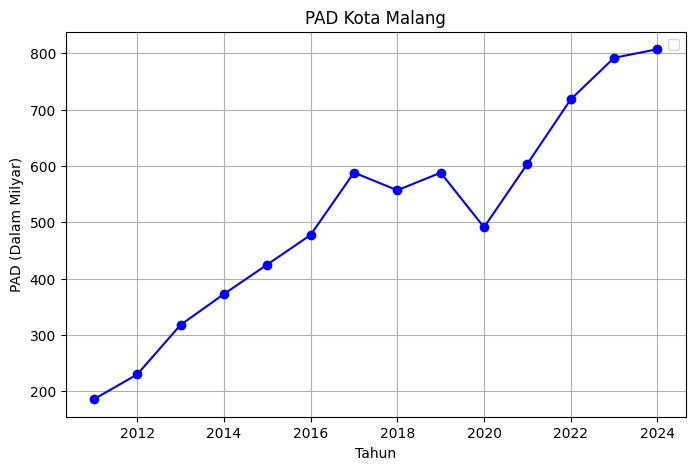

In [ ]:
# Membuat grafik data time series
tahun = np.arange(2011, 2025)  # Membuat array tahun dari 2011 hingga 2022

# Plot
plt.figure(figsize=(8,5))
plt.plot(tahun, data, marker='o', linestyle='-', color='b')
plt.xlabel('Tahun')
plt.ylabel('PAD (Dalam Milyar)')
plt.title('PAD Kota Malang')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
# Menghitung rata-rata
mean = np.mean(data)
# Menghitung standar deviasi
std_dev = np.std(data, ddof=1)
# Menghitung Koefisien Variasi (KV)
kv = (std_dev / mean) * 100
print(f"Rata-rata (Mean): {mean:.2f}")
print(f"Standar Deviasi (SD): {std_dev:.2f}")
print(f"Koefisien Variasi (KV): {kv:.2f}%")


Rata-rata (Mean): 511.03
Standar Deviasi (SD): 192.69
Koefisien Variasi (KV): 37.71%


In [ ]:
# Membentuk barisan data latih
x0 = np.array([185.82, 229.81, 317.77, 372.55, 424.94, 477.54,
588.28, 556.89, 588.07, 491.19, 603.79
]
)
print ('x0 =', x0)



x0 = [185.82 229.81 317.77 372.55 424.94 477.54 588.28 556.89 588.07 491.19
 603.79]


In [ ]:
# Menghitung rata-rata
mean = np.mean(x0)

# Menghitung standar deviasi
std_dev = np.std(x0)

# Menghitung Koefisien Variasi (KV)
kv = (std_dev / mean) * 100

print(f"Rata-rata (Mean): {mean:.2f}")
print(f"Standar Deviasi (SD): {std_dev:.2f}")
print(f"Koefisien Variasi (KV): {kv:.2f}%")


Rata-rata (Mean): 439.70
Standar Deviasi (SD): 140.43
Koefisien Variasi (KV): 31.94%


In [ ]:
# Membangun AGO
def accumu(lis):
    total = 0
    for x in lis:
        total += x
        yield round(total, 2)  # Membulatkan hasil ke 1 angka di belakang koma
x1 = list(accumu(x0))
print('x1 =', x1)


x1 = [np.float64(185.82), np.float64(415.63), np.float64(733.4), np.float64(1105.95), np.float64(1530.89), np.float64(2008.43), np.float64(2596.71), np.float64(3153.6), np.float64(3741.67), np.float64(4232.86), np.float64(4836.65)]


In [ ]:
# Membangun MGO
def avg(lis):
  pre = lis[0]
  for x in lis:
      avgVal = (pre + x)/2
      pre = x
      yield avgVal
z1 = [x * -1 for x in list(avg(x1))]
z1 = np.delete(z1 ,0)
print ('z1 =', z1)

z1 = [ -300.725  -574.515  -919.675 -1318.42  -1769.66  -2302.57  -2875.155
 -3447.635 -3987.265 -4534.755]


In [ ]:
# Menentukan parameter a dan b
B = pd.DataFrame({'0': z1}) # Membentuk dataframe dari input x (z1)
B['1'] = 1  # Menambahkan kolom intercept
B_ = B.to_numpy()               # Matriks B
B_t = B_.T            # Transposenya
E1_pre = np.dot(B_t,B_)            # BᵗB
E1 = np.linalg.inv(E1_pre)      # (BᵗB)⁻¹
Xn = np.delete(x0, 0)           # ( Y ) Menghapus elemen ke-0
E2 = B_t.dot(Xn)                # Bᵗy
parameter = E1.dot(E2)          # (BᵗB)⁻¹ Bᵗy
a = parameter.item(0)           # slope (kemungkinan b)
b = parameter.item(1)           # intercept (kemungkinan a)
print ("parameter a :",a ,"dan parameter b:", b)



parameter a : -0.07343365855931769 dan parameter b: 303.3058964316271


In [ ]:
# Mendefinisikan persamaan grey
def dif_eq(k):
  return (x0[0] - (b/a)) * math.exp(-1*a*(k)) + (b/a)


In [ ]:
# Menghitung prediksi grey pada data latih
x_range = np.arange(0,x0.size+1)

def x_forecast(lis):
    forecast = []
    for x in lis:
        if x == 0:
            forecast.append(x0[0])  # Forecast for the first element is actual data
        else:
            x_fcst = dif_eq(x) - dif_eq(x - 1)
            forecast.append(x_fcst)
    return forecast
# x_range to cover all elements
x_range = np.arange(0, x0.size)  # Include index 0 for the first element

# Calculate forecasts
forecast_values = x_forecast(x_range)
print (forecast_values)

[np.float64(185.82), np.float64(328.87895453254896), np.float64(353.9385895620908), np.float64(380.90769705607363), np.float64(409.9317733510625), np.float64(441.1674011880332), np.float64(474.78309446465937), np.float64(510.9602073553033), np.float64(549.8939127033491), np.float64(591.7942549642248), np.float64(636.8872833796868)]


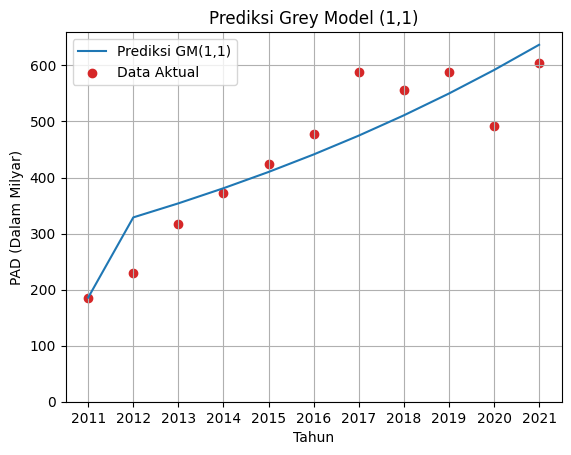

In [ ]:
# Memvisualisasikan hasil prediksi grey pada data latih
tahun = np.arange(2011, 2022)  # Membuat array tahun dari 2011 hingga 2021
# Plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Forecast values and original data
ax.plot(x_range + 1, forecast_values, color='tab:blue', label='Prediksi GM(1,1)') # x_range + 1 untuk indeks data
ax.scatter(np.arange(1, x0.size + 1), x0, color='tab:red', label='Data Aktual')
# Adding labels and legend
ax.set_title("Prediksi Grey Model (1,1)")
ax.set_xlabel("Tahun")
ax.set_ylabel("PAD (Dalam Milyar)")
ax.legend()
plt.xticks(x_range + 1, tahun)  # x_range + 1 untuk posisi tick, tahun untuk label
plt.grid(True)  # atau ax.grid(True)
# Set y-axis to start from 0
ax.set_ylim(bottom=0)
plt.show()

In [ ]:
# Menghitung error relatif
rel_error = []
for i in range(len(x0)):
    rel_error.append(((x0[i] - forecast_values[i]) / x0[i]) * 100)
# Determine state width
states = pd.cut(rel_error, bins=4, labels=[1, 2, 3,4])  # Discretize errors into states
df = pd.DataFrame({
    "x0": x0,
    "forecast_values": forecast_values,
    "rel_error": rel_error,
    "states" : states})
df


,x0,forecast_values,rel_error,states
0,185.82,185.820000,0.000000,3
1,229.81,328.878955,-43.109070,1
2,317.77,353.938590,-11.382003,3
3,372.55,380.907697,-2.243376,3
4,424.94,409.931773,3.531846,3
5,477.54,441.167401,7.616660,4
6,588.28,474.783094,19.293008,4
7,556.89,510.960207,8.247552,4
8,588.07,549.893913,6.491759,4
9,491.19,591.794255,-20.481739,2


In [ ]:
rel_error

[np.float64(0.0),
 np.float64(-43.10907033312256),
 np.float64(-11.382002568552979),
 np.float64(-2.24337593774624),
 np.float64(3.531846060370293),
 np.float64(7.6166601356884955),
 np.float64(19.2930076724248),
 np.float64(8.247552056006878),
 np.float64(6.491759024716609),
 np.float64(-20.481739238222442),
 np.float64(-5.481588529072495)]

In [ ]:
# Melihat batas bawah dan atas dari setiap state
bins = pd.cut(rel_error, bins=4)  # Get intervals without labels
print("Batas bawah dan atas tiap state:")
# Get the underlying IntervalIndex
interval_index = bins.categories
# Membuat daftar untuk state, lower, dan upper
state = []
lower = []
upper = []
for i, interval in enumerate(interval_index, start=1):
    state.append(i)
    lower.append(interval.left)
    upper.append(interval.right)
# Mengubah menjadi DataFrame
batas = pd.DataFrame({
    "State": state,
    "Lower": lower,
    "Upper": upper
})

print(batas)


Batas bawah dan atas tiap state:
   State   Lower   Upper
0      1 -43.171 -27.509
1      2 -27.509 -11.908
2      3 -11.908   3.692
3      4   3.692  19.293


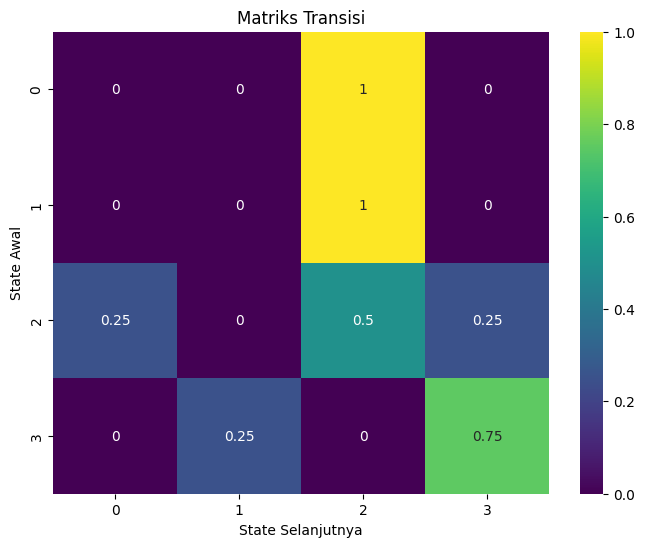

In [ ]:
# Membuat matriks peluang transisi
n_states = len(set(states))
# Function to build a transition matrix for a given subset of states
def create_transition_matrix(current_states, n_states):
    matrix = np.zeros((n_states, n_states))
    for i in range(len(current_states) - 1):
        current_state = current_states[i] - 1  # Adjust for 0-based indexing
        next_state = current_states[i + 1] - 1
        matrix[current_state, next_state] += 1
    # Normalize rows to probabilities
    row_sums = matrix.sum(axis=1, keepdims=True)
    return np.divide(matrix, row_sums, out=np.zeros_like(matrix), where=row_sums != 0)
# Transition Matrix
matriks = create_transition_matrix(states, n_states )
plt.figure(figsize=(8, 6))
sns.heatmap(matriks, annot=True, cmap='viridis')
plt.title(f'Matriks Transisi')
plt.ylabel('State Awal')
plt.xlabel('State Selanjutnya')
plt.show()

In [ ]:
# Membangun matriks transisi n langkah
def matrix_power(P, n):
    if n < 1:
        raise ValueError("Pangkat matriks harus lebih besar atau sama dengan 1.")
    powers = [np.copy(P)]  # Mulai dengan P^1
    current_power = np.copy(P)
    for i in range(2, n + 1):
        current_power = np.dot(current_power, P)  # Hitung P^i
        powers.append(np.copy(current_power))
    return powers
# Penggunaan
P = matriks
n = 14
powers = matrix_power(P, n)
# Cetak hasil
for i, power in enumerate(powers, start=1):
    print(f"Matriks P pangkat {i} adalah:")
    print(power)
    print()


Matriks P pangkat 1 adalah:
[[0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.25 0.   0.5  0.25]
 [0.   0.25 0.   0.75]]

Matriks P pangkat 2 adalah:
[[0.25   0.     0.5    0.25  ]
 [0.25   0.     0.5    0.25  ]
 [0.125  0.0625 0.5    0.3125]
 [0.     0.1875 0.25   0.5625]]

Matriks P pangkat 3 adalah:
[[0.125    0.0625   0.5      0.3125  ]
 [0.125    0.0625   0.5      0.3125  ]
 [0.125    0.078125 0.4375   0.359375]
 [0.0625   0.140625 0.3125   0.484375]]

Matriks P pangkat 4 adalah:
[[0.125      0.078125   0.4375     0.359375  ]
 [0.125      0.078125   0.4375     0.359375  ]
 [0.109375   0.08984375 0.421875   0.37890625]
 [0.078125   0.12109375 0.359375   0.44140625]]

Matriks P pangkat 5 adalah:
[[0.109375   0.08984375 0.421875   0.37890625]
 [0.109375   0.08984375 0.421875   0.37890625]
 [0.10546875 0.09472656 0.41015625 0.38964844]
 [0.08984375 0.11035156 0.37890625 0.42089844]]

Matriks P pangkat 6 adalah:
[[0.10546875 0.09472656 0.41015625 0.38964844]
 [0.10546875 0.09472656 0.4

In [ ]:
# Membuat prediksi grey-markov model pada data latih
# Create error_bounds dictionary using the state, lower, and upper lists
error_bounds = {}
for i in range(len(state)):
    error_bounds[state[i]] = {'lower': lower[i], 'upper': upper[i]}
# Adjust forecast based on the error bounds for each state
def adjust_forecast(df, error_bounds):
    adjusted_forecast = df['forecast_values'].copy()
    for i in range(len(df)):
        state = df['states'][i]
        lower_error = error_bounds[state]['lower']
        upper_error = error_bounds[state]['upper']
        # Calculate the average error bound and adjust the forecast
        error_percentage = (lower_error + upper_error) / 2 / 100
        adjusted_forecast[i] = adjusted_forecast[i] * (1 + error_percentage)  # Apply error adjustment
    return adjusted_forecast
# Apply the adjustment
adjusted_forecast = adjust_forecast(df, error_bounds)
# Create error_bounds dictionary using the state, lower, and upper lists
error_bounds = {}
for i in range(len(state)):
    error_bounds[state[i]] = {'lower': lower[i], 'upper': upper[i]}
# Adjust forecast based on the error bounds for each state
def adjust_forecast(df, error_bounds):
    adjusted_forecast = df['forecast_values'].copy()
    for i in range(len(df)):
        state = df['states'][i]
        lower_error = error_bounds[state]['lower']
        upper_error = error_bounds[state]['upper']
        # Calculate the average error bound and adjust the forecast
        error_percentage = (lower_error + upper_error) / 2 / 100
        adjusted_forecast[i] = adjusted_forecast[i] * (1 + error_percentage)  # Apply error adjustment
    return adjusted_forecast
# Apply the adjustment
adjusted_forecast = adjust_forecast(df, error_bounds)
# Display the updated DataFrame
df = pd.DataFrame({
    "tahun" : range(2011,2022),
    "nilai_aktual": x0,
    "grey_prediction": forecast_values,
    "rel_error": rel_error,
    "states" : states,
    "grey_markov_prediction": adjusted_forecast})
df


,tahun,nilai_aktual,grey_prediction,rel_error,states,grey_markov_prediction
0,2011,185.82,185.820000,0.000000,3,178.186514
1,2012,229.81,328.878955,-43.109070,1,212.653132
2,2013,317.77,353.938590,-11.382003,3,339.398792
3,2014,372.55,380.907697,-2.243376,3,365.260009
4,2015,424.94,409.931773,3.531846,3,393.091776
5,2016,477.54,441.167401,7.616660,4,491.868565
6,2017,588.28,474.783094,19.293008,4,529.347542
7,2018,556.89,510.960207,8.247552,4,569.682309
8,2019,588.07,549.893913,6.491759,4,613.090471
9,2020,491.19,591.794255,-20.481739,2,475.160484


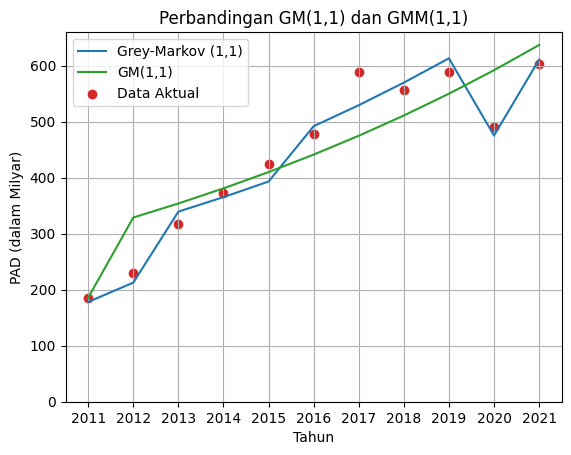

In [ ]:
# Memvisualisasikan hasil prediksi grey-markov pada data latih
tahun = np.arange(np.int64(2011), np.int64(2022))  # Membuat array tahun dari 2011 hingga 2021
# Plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Forecast values and original data
ax.plot(x_range + 1, adjusted_forecast, color='tab:blue', label='Grey-Markov (1,1)') # x_range + 1 untuk indeks data
ax.plot(x_range + 1, forecast_values, color='tab:green', label='GM(1,1)') # x_range + 1 untuk indeks data
ax.scatter(np.arange(1, x0.size + 1), x0, color='tab:red', label='Data Aktual')
# Adding labels and legend
ax.set_title("Perbandingan GM(1,1) dan GMM(1,1)")
ax.set_xlabel("Tahun")
ax.set_ylabel("PAD (dalam Milyar)")
ax.legend()
plt.xticks(x_range + 1, tahun)  # x_range + 1 untuk posisi tick, tahun untuk label
plt.grid(True)  # atau ax.grid(True)
ax.set_ylim(bottom=0)
plt.show()

In [ ]:
# Menghitung MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# MAPE untuk hasil awal GM(1,1)
mape_gm = calculate_mape(x0, forecast_values)

# MAPE untuk prediksi yang telah disesuaikan dengan Markov
mape_adjusted = calculate_mape(x0, adjusted_forecast)

# Menampilkan hasil
print(f"MAPE GM(1,1): {mape_gm:.2f}%")
print(f"MAPE Grey-Markov (1,1): {mape_adjusted:.2f}%")


MAPE GM(1,1): 11.63%
MAPE Grey-Markov (1,1): 4.71%


In [ ]:
def posterior_variance_test(x, x_hat):
    # Menghitung residual
    epsilon = x - x_hat

    # Jumlah data
    n = len(x)

    # Hitung S1: Root-mean-square deviation dari data aktual
    S1 = np.sqrt(np.sum((x - np.mean(x))**2) / (n - 1))

    # Hitung S2: Root-mean-square deviation dari residual
    S2 = np.sqrt(np.sum((epsilon - np.mean(epsilon))**2) / (n - 1))

    # Menghitung ratio C
    C = S2 / S1 if S1 != 0 else np.nan

    # Hitung small-error probability (P)
    threshold = 0.6745 * S1
    count_small_errors = np.sum(np.abs(epsilon - np.mean(epsilon)) < threshold)
    P = count_small_errors / n
    return C, P

  # PVT untuk hasil awal GM(1,1)
C_gm, P_gm = posterior_variance_test(x0, forecast_values)

# PVT untuk prediksi yang telah disesuaikan dengan Markov
C_adjusted, P_adjusted = posterior_variance_test(x0, adjusted_forecast)

print(f"C GM(1,1): {C_gm:.4f}, P GM(1,1): {P_gm:.4f}")
print(f"C Grey-Markov (1,1): {C_adjusted:.4f}, P Grey-Markov (1,1): {P_adjusted:.4f}")

C GM(1,1): 0.4312, P GM(1,1): 0.9091
C Grey-Markov (1,1): 0.1711, P Grey-Markov (1,1): 1.0000




---
**Data Test**


In [ ]:
next = x0.size + 1
next_fcst = dif_eq(next) - dif_eq(next - 1)

# Menentukan state terakhir (misalnya menggunakan elemen terakhir dari vektor)
state_terakhir_index = states[-1]

# Membuat vektor state berdasarkan state terakhir
state_terakhir = np.zeros(4)  # Misalnya ada 4 state
state_terakhir[state_terakhir_index - 1] = 1  # Menggunakan indeks untuk set ke 1


# Prediksi state berikutnya
state_selanjutnya = np.dot(state_terakhir, matriks)

highest_index = np.argmax(state_selanjutnya)
next_forecast = next_fcst * (1 + (lower[highest_index]+upper[highest_index])/2/100)
next_forecast

print ("Prediksi selanjutnya dengan GM(1,1):",next_fcst)
print ('Prediksi selanjutnya dengan Grey-Markov(1,1):', next_forecast)

Prediksi selanjutnya dengan GM(1,1): 737.6430296102953
Prediksi selanjutnya dengan Grey-Markov(1,1): 707.3406539539044


In [ ]:
# Fungsi untuk memprediksi n langkah ke depan dengan pemangkatan matriks dan menggunakan persamaan dif_eq
def predict_n_steps(state_terakhir, matriks, lower, upper, n):
    grey_markov = []
    grey_model = []
    current_state = state_terakhir
    for step in range(1, n + 1):
        # Matriks dipangkatkan dengan langkah saat ini
        matriks_pangkat = np.linalg.matrix_power(matriks, step)
        # Menghitung prediksi berdasarkan diferensial
        next_index = len(forecast_values) + step
        next_grey_model = dif_eq(next_index) - dif_eq(next_index - 1)
        # Prediksi state berikutnya menggunakan matriks yang dipangkatkan
        state_selanjutnya = np.dot(current_state, matriks_pangkat)
        # Menentukan state yang memiliki nilai tertinggi
        highest_index = np.argmax(state_selanjutnya)
        # Prediksi nilai forecast berikutnya berdasarkan state
        adjusted_forecast = next_grey_model * (1 + (lower[highest_index] + upper[highest_index]) / 2 / 100)
        grey_model.append(next_grey_model)
        grey_markov.append(adjusted_forecast)
        # Update state_terakhir untuk iterasi berikutnya
        current_state = np.zeros(4)
        current_state[highest_index] = 1
    return grey_markov, grey_model
# Prediksi n langkah ke depan
n_steps = 3  # Misalnya kita ingin memprediksi 3 langkah ke depan
grey_markov, grey_model = predict_n_steps(state_terakhir, matriks, lower, upper, n_steps)
# Format hasil dalam bentuk kalimat
tahun_awal = 2022
for i in range(n_steps):
    tahun = tahun_awal + i
    print(f"Tahun {tahun}: Prediksi dengan metode Grey (1,1) adalah {grey_model[i]:.3f}, dan Grey Markov adalah {grey_markov[i]:.3f}.")


Tahun 2022: Prediksi dengan metode Grey (1,1) adalah 737.643, dan Grey Markov adalah 707.341.
Tahun 2023: Prediksi dengan metode Grey (1,1) adalah 793.849, dan Grey Markov adalah 761.238.
Tahun 2024: Prediksi dengan metode Grey (1,1) adalah 854.338, dan Grey Markov adalah 819.242.


In [ ]:
# Menghitung MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

data_aktual_test = np.array([
718.34, 792.12, 807.33])
data_test_gmm = np.array(grey_markov)
data_test_gm = np.array(grey_model)

# MAPE untuk hasil awal GM(1,1)
mape_gm = calculate_mape(data_aktual_test, data_test_gm )

# MAPE untuk prediksi yang telah disesuaikan dengan Markov
mape_gmm = calculate_mape(data_aktual_test, data_test_gmm)

# Menampilkan hasil
print(f"MAPE GM(1,1): {mape_gm:.2f}%")
print(f"MAPE Grey-Markov (1,1): {mape_gmm:.2f}%")



MAPE GM(1,1): 2.91%
MAPE Grey-Markov (1,1): 2.30%


In [ ]:
# Menghitung PVT
def posterior_variance_test(x, x_hat):
    # Menghitung residual
    epsilon = x - x_hat
    # Jumlah data
    n = len(x)
    # Hitung S1: Root-mean-square deviation dari data aktual
    S1 = np.sqrt(np.sum((x - np.mean(x))**2) / (n - 1))
    # Hitung S2: Root-mean-square deviation dari residual
    S2 = np.sqrt(np.sum((epsilon - np.mean(epsilon))**2) / (n - 1))
    # Menghitung ratio C
    C = S2 / S1 if S1 != 0 else np.nan
    # Hitung small-error probability (P)
    threshold = 0.6745 * S1
    count_small_errors = np.sum(np.abs(epsilon - np.mean(epsilon)) < threshold)
    P = count_small_errors / n
    return C, P, S1, S2
# Posterior Variance Test
C_gm, P_gm, S1_gm, S2_gm = posterior_variance_test(data_aktual_test, data_test_gm)
C_gmm, P_gmm, S1_gmm, S2_gmm = posterior_variance_test(data_aktual_test, data_test_gmm)
print(f"C GM(1,1): {C_gm:.4f}, P GM(1,1): {P_gm:.4f},")
print(f"C Grey-Markov (1,1): {C_gmm:.4f}, P Grey-Markov (1,1): {P_gmm:.4f}")
print(S1_gm, S2_gm)
print(S1_gmm, S2_gmm)


C GM(1,1): 0.4796, P GM(1,1): 1.0000,
C Grey-Markov (1,1): 0.4499, P Grey-Markov (1,1): 1.0000
47.59911168638899 22.8276618063291
47.59911168638899 21.414934601291527


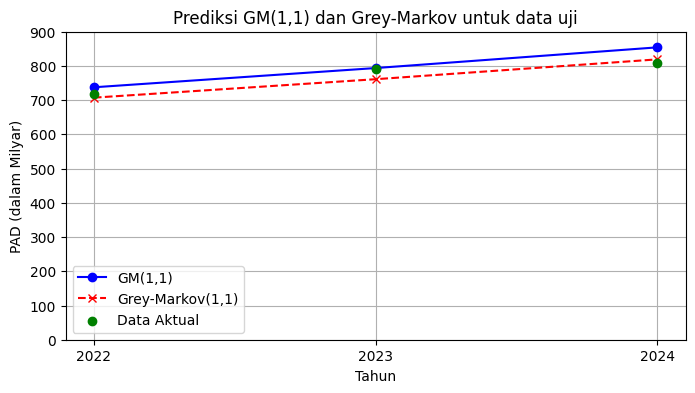

In [ ]:
# Membuat grafik
tahun = np.arange(2022, 2025)
plt.figure(figsize=(8, 4))
plt.plot(tahun, grey_model, label="GM(1,1)", marker='o', linestyle='-', color='b')
plt.plot(tahun, grey_markov, label="Grey-Markov(1,1)", marker='x', linestyle='--', color='r')
plt.scatter(tahun, data_aktual_test, label="Data Aktual", color='g', zorder=3)  # Titik di depan
plt.xticks(tahun, rotation=0, ha='center')  # rotation=0 untuk orientasi horizontal, ha='center' untuk menengahkan teks
plt.yticks(np.arange(0, 901, 100))  # Label y dari 0 hingga 900 dengan interval 100

# Menambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('PAD (dalam Milyar)')
plt.title('Prediksi GM(1,1) dan Grey-Markov untuk data uji')
plt.grid(True)
plt.legend()

# Menampilkan grafik
plt.show()

In [ ]:
# Prediksi grey-markov model untuk tahun berikutnya
grey_model_pred =[]
grey_markov_pred =[]
# Prediksi n langkah ke depan
n_steps =  14 # Misalnya kita ingin memprediksi 3 langkah ke depan
grey_markov_pred, grey_model_pred = predict_n_steps(state_terakhir, matriks, lower, upper, n_steps)
# Format hasil dalam bentuk kalimat
tahun_awal = 2022
for i in range(n_steps):
    tahun = tahun_awal + i
    print(f"Tahun {tahun}: Prediksi dengan metode Grey (1,1) adalah {grey_model_pred[i]:.3f}, dan Grey Markov adalah {grey_markov_pred[i]:.3f}.")


Tahun 2022: Prediksi dengan metode Grey (1,1) adalah 737.643, dan Grey Markov adalah 707.341.
Tahun 2023: Prediksi dengan metode Grey (1,1) adalah 793.849, dan Grey Markov adalah 761.238.
Tahun 2024: Prediksi dengan metode Grey (1,1) adalah 854.338, dan Grey Markov adalah 819.242.
Tahun 2025: Prediksi dengan metode Grey (1,1) adalah 919.437, dan Grey Markov adalah 881.666.
Tahun 2026: Prediksi dengan metode Grey (1,1) adalah 989.495, dan Grey Markov adalah 948.846.
Tahun 2027: Prediksi dengan metode Grey (1,1) adalah 1064.892, dan Grey Markov adalah 1021.146.
Tahun 2028: Prediksi dengan metode Grey (1,1) adalah 1146.033, dan Grey Markov adalah 1098.954.
Tahun 2029: Prediksi dengan metode Grey (1,1) adalah 1233.358, dan Grey Markov adalah 1182.691.
Tahun 2030: Prediksi dengan metode Grey (1,1) adalah 1327.336, dan Grey Markov adalah 1272.809.
Tahun 2031: Prediksi dengan metode Grey (1,1) adalah 1428.475, dan Grey Markov adalah 1369.794.
Tahun 2032: Prediksi dengan metode Grey (1,1) adal

In [ ]:
grey_model_pred = grey_model_pred[3:]
grey_markov_pred = grey_markov_pred[3:]


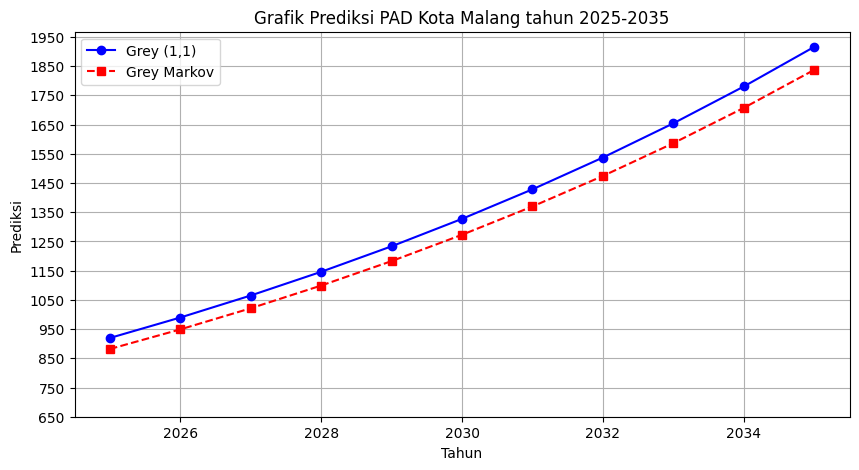

In [ ]:
# Memvisualisasikan hasil prediksi grey dan grey-markov sampai tahun 2035
years = np.arange(2025, 2036)
# Plot
plt.figure(figsize=(10, 5))
plt.plot(years, grey_model_pred, marker='o', linestyle='-', label='Grey (1,1)', color='blue')
plt.plot(years, grey_markov_pred, marker='s', linestyle='--', label='Grey Markov', color='red')
plt.yticks(np.arange(650, 2000, 100))  # Label y dari 0 hingga 900 dengan interval 100
# Labels dan judul
plt.xlabel('Tahun')
plt.ylabel('Prediksi')
plt.title('Grafik Prediksi PAD Kota Malang tahun 2025-2035')
plt.legend()
plt.grid(True)
plt.show()


**DONE**